In [1]:

import pickle
import pandas as pd

# Ruta al archivo PKL que quieres leer
archivo_pkl = 'business.pkl'

# Abrir y cargar el archivo PKL
with open(archivo_pkl, 'rb') as file:
    business = pickle.load(file)


In [2]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
business.shape

(150346, 28)

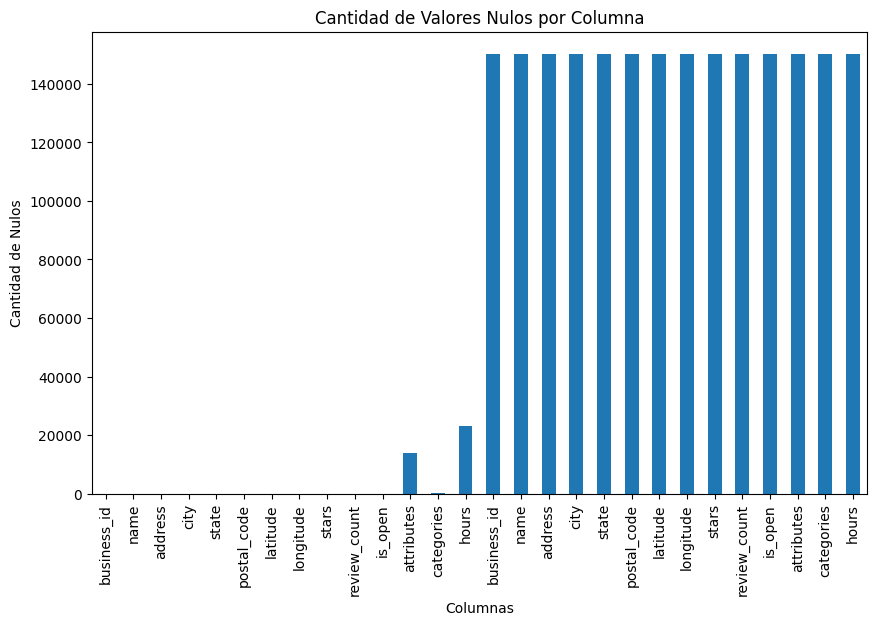

In [4]:
import matplotlib.pyplot as plt

# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()



# Se eliminan duplicados

In [5]:
duplicate_column = 'business_id'  # Nombre de la columna repetida
business = business.loc[:, ~business.columns.duplicated()]


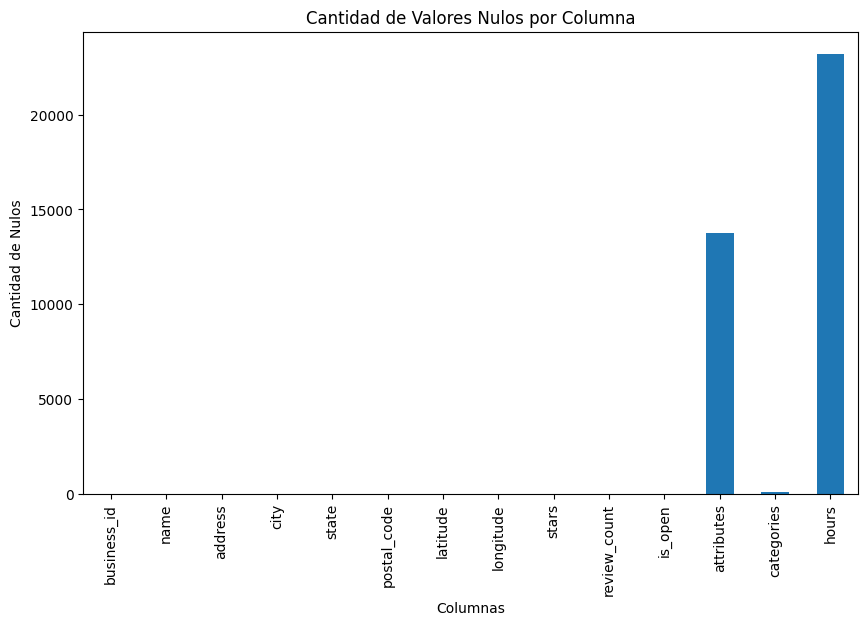

In [6]:
# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

# Porcentajes de nulos para las columnas "atributes" y "hours"

In [7]:
# Calcular el porcentaje de nulos en las columnas 'attributes' y 'hours'
attributes_null_percentage = (business["attributes"].isnull().sum() / len(business)) * 100
hours_null_percentage = (business["hours"].isnull().sum() / len(business)) * 100

# Imprimir los porcentajes de nulos con formato
print("Porcentaje de nulos en la columna 'attributes': {:.2f}%".format(attributes_null_percentage))
print("Porcentaje de nulos en la columna 'hours': {:.2f}%".format(hours_null_percentage))


Porcentaje de nulos en la columna 'attributes': 9.14%
Porcentaje de nulos en la columna 'hours': 15.45%


In [8]:
business.dtypes

business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object

# Columnas hours contiene datos anidados

In [9]:
business["hours"].head(10)

0                                                 None
1    {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2    {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
5    {'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...
6    {'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...
7    {'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...
8                                                 None
9    {'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...
Name: hours, dtype: object

# Se desanida la columna "hours"

In [10]:

# Crear una nueva columna para cada día de la semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days:
    business[day] = business['hours'].apply(lambda x: x.get(day, None) if x is not None else None)


In [11]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes,categories,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,None,None,None,None,None,None,None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,None
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",None,None,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0


# ¿Se elimina hours? Esta parte se saltea

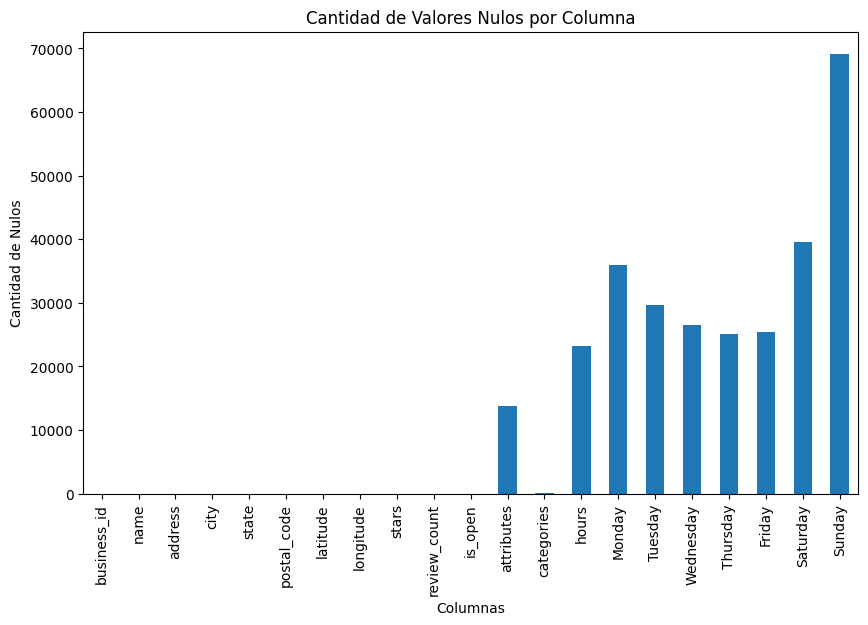

In [12]:
# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

# Sería conveniente eliminar hours

In [10]:
# Eliminar la columna 'hours' original
business.drop(columns=['hours'], inplace=True)

# Columna Atributes

por lo anterior, si se elimina Atributes se está sacano el 9% de los datos aprox

In [11]:
business.drop(columns=['attributes'], inplace=True)

se corrobora cuántos nulos quedan

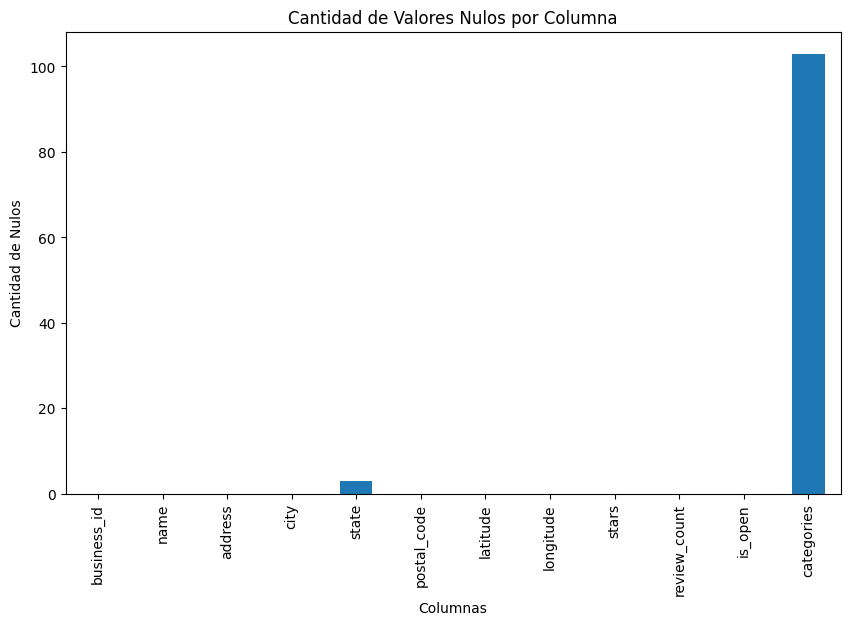

In [12]:
# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

quitar estos valores faltantes no cambia significativamente la estructura del dataset

In [13]:
business.dropna(inplace=True)

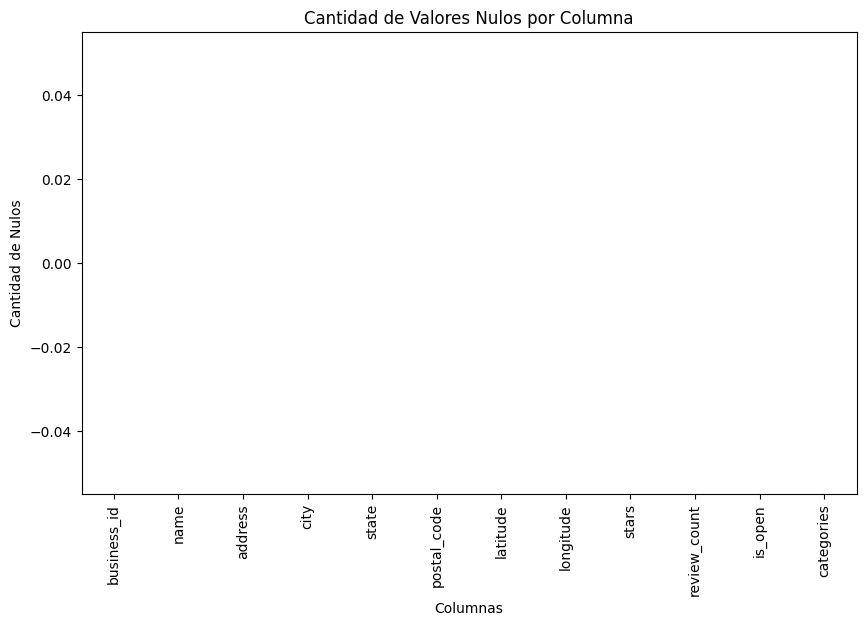

In [14]:
# Contar los valores nulos por columna
null_counts = business.isnull().sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()

In [15]:
business.to_csv('data.csv', index=False)

# Archivo checkin.json

In [16]:
import json

# Inicializar una lista para almacenar los objetos JSON
data_list = []

# Abrir el archivo JSON y cargar su contenido línea por línea
with open('checkin.json', 'r') as file:
    for line in file:
        try:
            item = json.loads(line)
            data_list.append(item)
        except json.JSONDecodeError:
            pass  # Ignorar líneas inválidas



In [17]:
checkin = pd.DataFrame(data_list)

In [18]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


La columna "date" contiene datos separados por coma. Se separará el dataset de acuerdo a las fechas por coma

In [19]:
# Crear una lista para almacenar las fechas separadas
separated_dates = []

# Iterar sobre las filas y separar las fechas
for index, row in checkin.iterrows():
    dates = row['date'].split(', ')
    for date in dates:
        separated_dates.append([row['business_id'], date])

# Crear un nuevo DataFrame con las fechas separadas
new_columns = ['business_id', 'date']
checkin = pd.DataFrame(separated_dates, columns=new_columns)

In [20]:
# CSe convierte la columna 'date' a formato datetime
checkin['date'] = pd.to_datetime(checkin['date'])

# Valores nulos

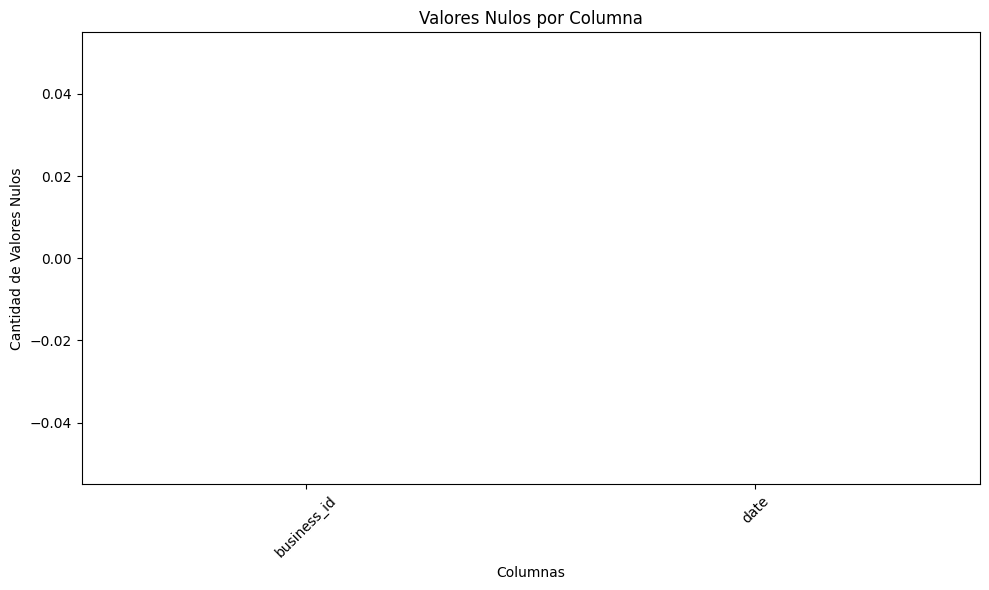

In [21]:
# Calcular la cantidad de valores nulos por columna
null_counts = checkin.isnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos por Columna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sin nulos

In [22]:
checkin.to_json('checkin_modif.jsonl', orient='records', lines=True, compression='gzip')


# Visualización de los datos

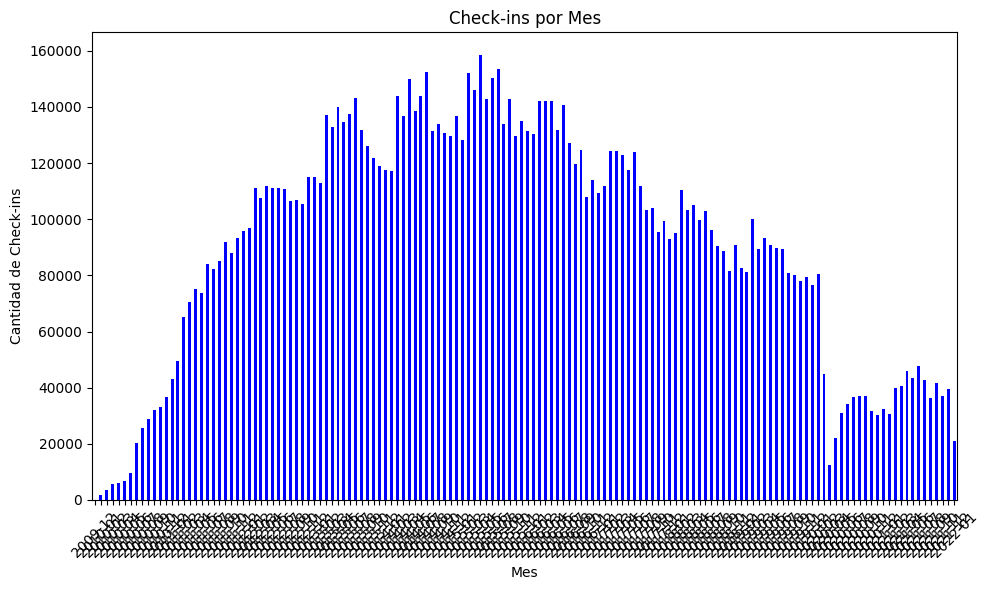

In [23]:

import matplotlib.pyplot as plt


# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin.groupby(checkin['date'].dt.to_period('M')).size()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



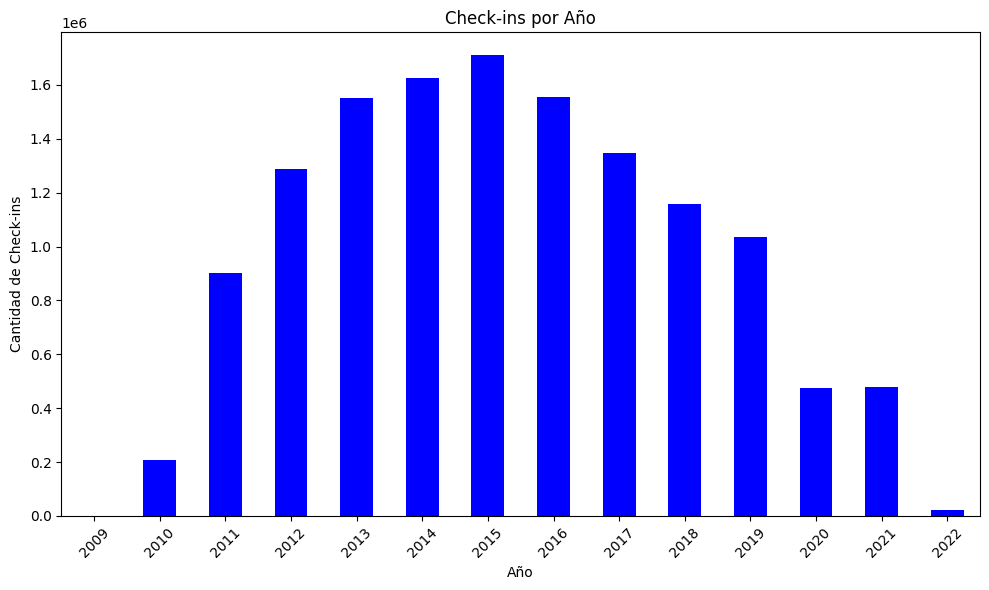

In [24]:
# Agrupa los datos por año y cuenta la cantidad de eventos de check-in en cada año
checkin_grouped = checkin.groupby(checkin['date'].dt.year).size()

# Crear un gráfico de barras para la cantidad de check-ins por año
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Años 2020 - 2021 y 2022

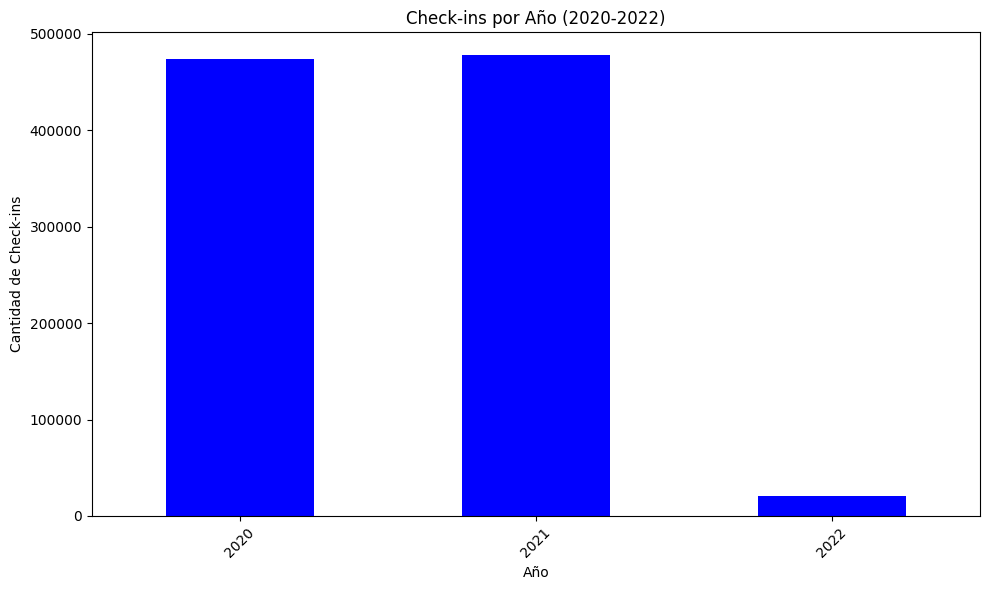

In [25]:
# Filtrar los datos para incluir solo los años 2020, 2021 y 2022
checkin_filtered = checkin[checkin['date'].dt.year.isin([2020, 2021, 2022])]

# Agrupa los datos por año y cuenta la cantidad de eventos de check-in en cada año
checkin_grouped = checkin_filtered.groupby(checkin_filtered['date'].dt.year).size()

# Crear un gráfico de barras para la cantidad de check-ins por año
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Año (2020-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Año 2020

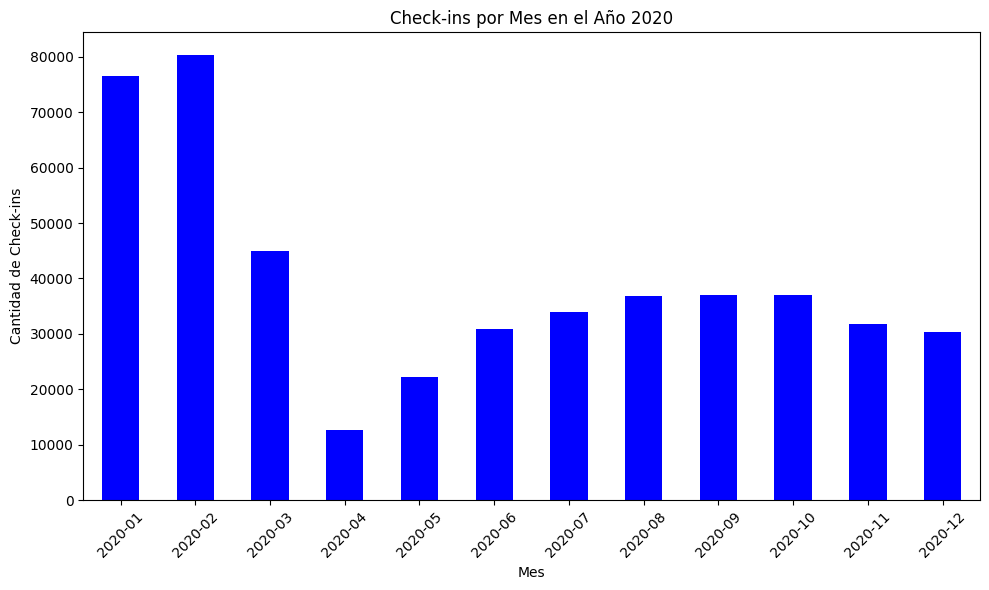

In [26]:
# Filtrar los datos para incluir solo el año 2020
checkin_2020 = checkin[checkin['date'].dt.year == 2020]

# Crear un índice con todos los meses del año 2020
months_index = pd.period_range(start='2020-01', end='2020-12', freq='M')

# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin_2020.groupby(checkin_2020['date'].dt.to_period('M')).size()

# Reindexar para incluir todos los meses y llenar valores faltantes con ceros
checkin_grouped = checkin_grouped.reindex(months_index, fill_value=0)

# Crear un gráfico de barras para la cantidad de check-ins por mes en el año 2022
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes en el Año 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Año 2021

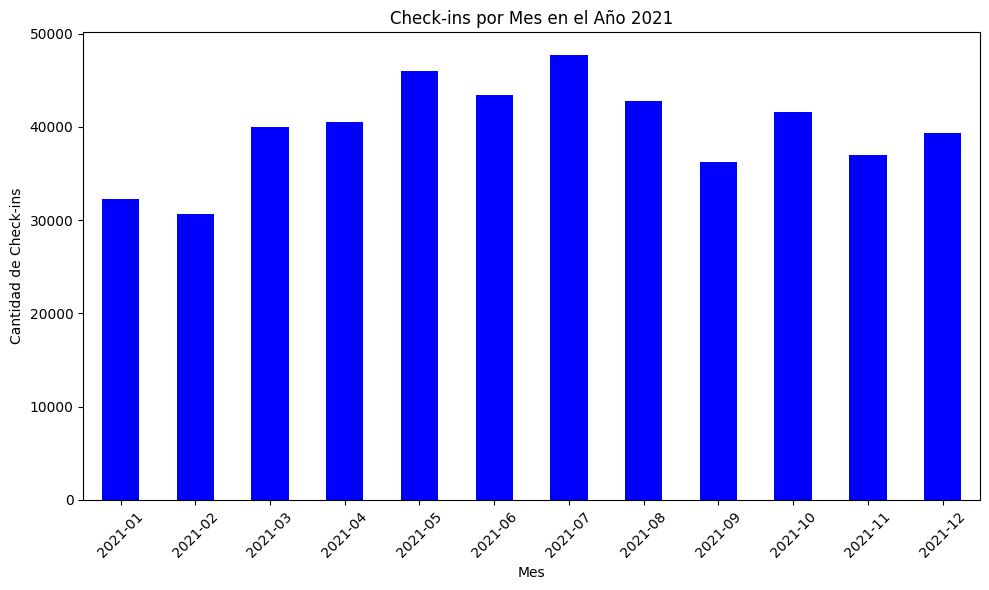

In [27]:
# Filtrar los datos para incluir solo el año 2021
checkin_2021 = checkin[checkin['date'].dt.year == 2021]

# Crear un índice con todos los meses del año 2021
months_index = pd.period_range(start='2021-01', end='2021-12', freq='M')

# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin_2021.groupby(checkin_2021['date'].dt.to_period('M')).size()

# Reindexar para incluir todos los meses y llenar valores faltantes con ceros
checkin_grouped = checkin_grouped.reindex(months_index, fill_value=0)

# Crear un gráfico de barras para la cantidad de check-ins por mes en el año 2021
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes en el Año 2021')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Año 2022

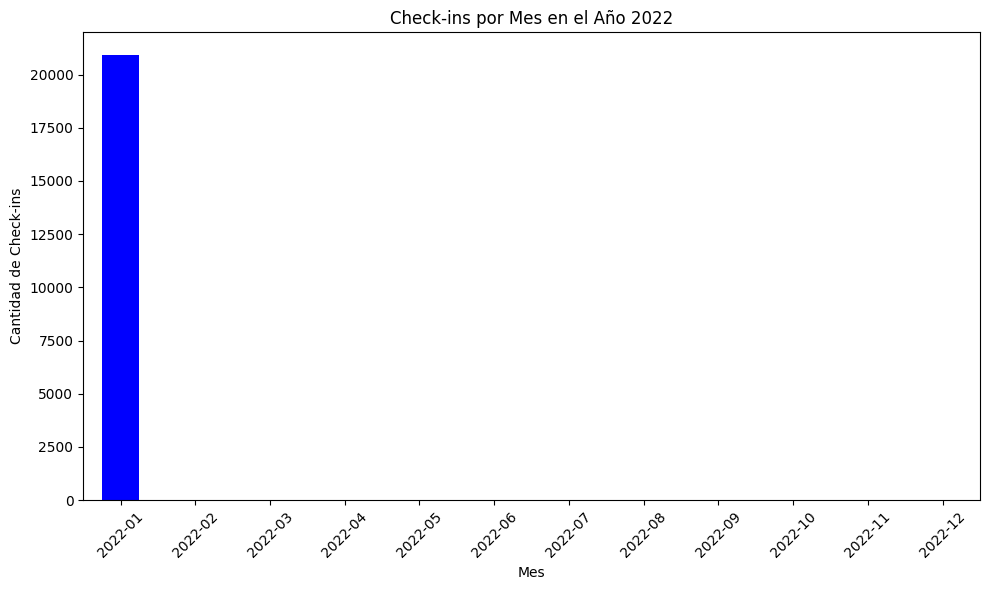

In [28]:
# Filtrar los datos para incluir solo el año 2022
checkin_2022 = checkin[checkin['date'].dt.year == 2022]

# Crear un índice con todos los meses del año 2022
months_index = pd.period_range(start='2022-01', end='2022-12', freq='M')

# Agrupa los datos por mes y cuenta la cantidad de eventos de check-in en cada mes
checkin_grouped = checkin_2022.groupby(checkin_2022['date'].dt.to_period('M')).size()

# Reindexar para incluir todos los meses y llenar valores faltantes con ceros
checkin_grouped = checkin_grouped.reindex(months_index, fill_value=0)

# Crear un gráfico de barras para la cantidad de check-ins por mes en el año 2021
plt.figure(figsize=(10, 6))
checkin_grouped.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.title('Check-ins por Mes en el Año 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Archivo tips

In [29]:
import json

# Inicializar una lista para almacenar los objetos JSON
data_list = []

# Abrir el archivo JSON y cargar su contenido línea por línea
with open('tips.json', 'r') as file:
    for line in file:
        try:
            item = json.loads(line)
            data_list.append(item)
        except json.JSONDecodeError:
            pass  # Ignorar líneas inválidas


In [30]:
tips = pd.DataFrame(data_list)

In [31]:
tips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [32]:
tips.dtypes

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

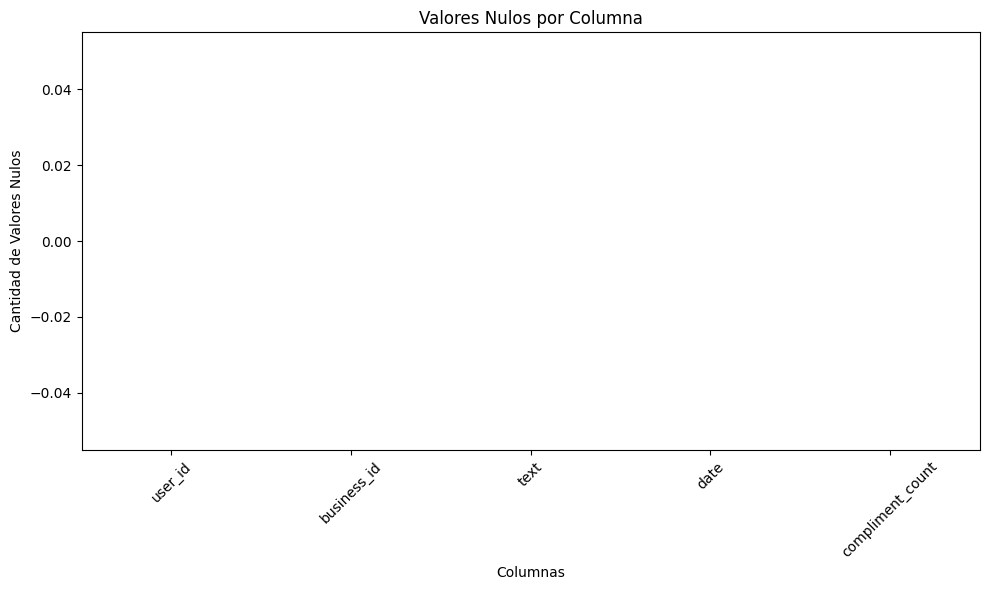

In [33]:
# Calcular la cantidad de valores nulos por columna
null_counts = tips.isnull().sum()

# Crear un gráfico de barras para los valores nulos
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='red')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos por Columna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sin nulos

# Dimensiones de los 3 dataframes

In [34]:
tips.shape

(908915, 5)

In [35]:
checkin.shape

(13356875, 2)

In [36]:
business.shape

(150240, 12)